### 数据处理

**①读取数据**

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

path =  r'G:\课件\人工智能\作业\实验4_分类算法\dataset-compliance.xlsx'
data = pd.read_excel(path, sheet_name = 1)
print(data)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
0                          49                6652.68         59.50   
1                          49                6652.68         32.00   
2                           9               26360.32        111.50   
3                           0               14410.71         84.00   
4                           9                7294.69        290.00   
5                           0                6836.32        116.40   
6                           9               26360.32        169.74   
7                           9               26360.32       3117.92   
8                           9               26360.32        298.62   
9                           0               14742.75        613.50   
10                          0               14742.75        613.50   
11                          0                 992.00         21.00   
12                          2               22994.15         45.50   
13                  

In [72]:
x = data.iloc[:, :6]               #iloc[]第一个逗号之前为：表示是选择所有的100000行数据， 之后的 ：6表示选取前6行特征
y = data.iloc[:, 6:7]

print(x)
print(y)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
0                          49                6652.68         59.50   
1                          49                6652.68         32.00   
2                           9               26360.32        111.50   
3                           0               14410.71         84.00   
4                           9                7294.69        290.00   
5                           0                6836.32        116.40   
6                           9               26360.32        169.74   
7                           9               26360.32       3117.92   
8                           9               26360.32        298.62   
9                           0               14742.75        613.50   
10                          0               14742.75        613.50   
11                          0                 992.00         21.00   
12                          2               22994.15         45.50   
13                  

**②划分数据**

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)        #用sklearn的estimators  train_test_split划分训练集与测试集
print(x_train)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
651                         1                8552.30        1998.0   
6560                        2                6547.73         100.0   
8974                       23                4755.28          31.0   
2348                        2               23037.00         288.0   
5670                        1                5545.50         436.0   
7454                        0                2999.00          77.5   
3689                       24                3547.00         872.0   
305                        25               16529.00          22.0   
7671                        2               10381.06         150.0   
5844                        6               11480.20         300.0   
3858                        7                9910.58         656.0   
8990                        5               13488.80         100.0   
4736                        0                5214.40          63.0   
2377                

### 决策树模型

**①训练与可视化展示**

In [74]:
import graphviz
from sklearn import tree

clf1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)              #定义一个决策树模型，可以采用信息增益的衡量方式
clf1.fit(x_train, y_train)                                        #训练
y_test_hat = clf1.predict(x_test)                                 #测试
 
dot_data1 = tree.export_graphviz(clf1, out_file = None,
                      feature_names=data.columns[:6],
                      class_names= ['0', '1'],
                      filled=True, rounded=True,  
                      special_characters=True)  

tree.plot_tree(clf1)                                                   #在jupyter里可视化决策树

graph1 = graphviz.Source(dot_data1)                                    #或者在同级目录下生成pdf文件
graph1.render("DecisionTree_entropy")                                

'DecisionTree_entropy.pdf'

**②特征重要性**

In [75]:
np.set_printoptions(precision = 2)
importances = clf1.feature_importances_
print("特征重要性：" , importances)

特征重要性： [0.16 0.18 0.04 0.03 0.   0.6 ]


In [76]:
plt.figure()
X= [1, 2, 3, 4, 5, 6]
Y = importances
plt.bar(X, Y, 0.4)             #设置X轴，宽度，高度
plt.xlabel("Feature")
plt.ylabel("importance")
plt.title("Feature Imprtance (DecisionTree)")
plt.xlim(0, 7)                  #设置X轴数值显示范围
ax = plt.gca()
ax.set_xticks(np.linspace(1, 6, 6))
ax.set_xticklabels(("GAP_between_Create_Last", " TOTAL_EXPENSED_AMOUNT", "APPROVED_AMT", "PAID_IN_AMOUNT_ALLOCATION",
                   "EXPENSE_TYPE_DESC", "CITY"), fontsize = 8)
for label in ax.get_xmajorticklabels():
    label.set_rotation(40)
    label.set_horizontalalignment("right")
plt.legend(loc = 'lower right', fontsize = 5)
plt.show()

No handles with labels found to put in legend.


**③混淆矩阵**

[[1793   64]
 [ 548   95]]


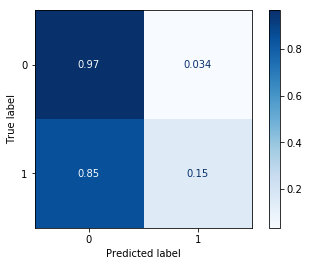

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class_names = ["0", "1"]
plot_confusion_matrix(clf1, x_test, y_test,                          #画混淆矩阵
                      display_labels = class_names,
                      cmap = plt.cm.Blues,
                      normalize = 'true')

cnf_confusion_matrix = confusion_matrix(y_test, y_test_hat)
print(cnf_confusion_matrix)

**④模型评价**

In [78]:
from sklearn.metrics import classification_report

class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat, target_names = class_names))          #显示精确度，召回率，F1值，support(每个标签出现次数)

              precision    recall  f1-score   support

           0       0.77      0.97      0.85      1857
           1       0.60      0.15      0.24       643

    accuracy                           0.76      2500
   macro avg       0.68      0.56      0.55      2500
weighted avg       0.72      0.76      0.70      2500



In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf1, x, y, cv = 5, scoring = 'f1_macro')
print(scores)

[0.56 0.55 0.57 0.52 0.54]


### 线性分类器模型(逻辑回归)

**①模型训练**

In [80]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(random_state=0)
clf2.fit(x_train, y_train.values.ravel())
y_test_hat = clf2.predict(x_test)

print("训练集准确度：", clf2.score(x_train, y_train))
print("测试集准确度：", clf2.score(x_test,y_test))

训练集准确度： 0.7524
测试集准确度： 0.7424


**②混淆矩阵**

[[1856    1]
 [ 643    0]]


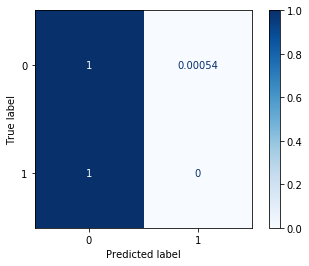

In [81]:
class_names = ["0", "1"]
plot_confusion_matrix(clf2, x_test, y_test,                          #画混淆矩阵
                      display_labels = class_names,
                      cmap = plt.cm.Blues,
                      normalize = 'true')

cnf_confusion_matrix = confusion_matrix(y_test, y_test_hat)
print(cnf_confusion_matrix)

**③模型评价**

In [82]:
class_names = ["0", "1"]
print(classification_report(y_test, y_test_hat, target_names = class_names))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1857
           1       0.00      0.00      0.00       643

    accuracy                           0.74      2500
   macro avg       0.37      0.50      0.43      2500
weighted avg       0.55      0.74      0.63      2500

